In [128]:
from Net import Burgers_DNN
import torch
from testProblem import Burgers_data
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import cm  
np.random.seed(123)
torch.manual_seed(123)


# 系统参数
region = [(-1,1),(0,1)]

# 网络结构参数
width = 30
blocks = 4

# 训练参数
bc = 'train'       # 'fix' or 'train'
loss_term = 'mix'  # 'mix' 'bc' or 'int'
beta = 1           # parameter balance loss_int and loss_partial
epochs = 401
sample_num_int = 2000
sample_num_partial = 100
show_interval = 50


model = Burgers_DNN(width=width,blocks=blocks,data=Burgers_data,bc=bc)
optimizer = torch.optim.LBFGS(
        model.parameters(),
        history_size=50,
        tolerance_change=1.0 * np.finfo(float).eps,
        line_search_fn="strong_wolfe",
    )
model.train(optimizer=optimizer,epochs=epochs,beta=beta,loss_term=loss_term,show_interval=show_interval,sample_num_int=sample_num_int,sample_num_partial=sample_num_partial)

Trainning Start!
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 0 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.2054   loss_int= 0.03942   loss_partial=0.166 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 50 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.006394   loss_int= 0.003009   loss_partial=0.003384 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 100 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.001614   loss_int= 0.0008416   loss_partial=0.0007728 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 150 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.0006201   loss_int= 0.000341   loss_partial=0.000279 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 200 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.0003902   loss_int= 0.0002305   loss_partial=0.0001597 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 250 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.000209   loss_int= 0.0001287   loss_partial=8.03e-05 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 300 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.0001237   loss_int= 7.316e-05   loss_partial=5.052e-05 
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 350 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=8.834e-05   loss_int= 5.856e-05   loss_partial=2.978e-05 
%%%

In [129]:
def relative_loss(u,u_real):
    a = np.sqrt(((u-u_real)**2).mean())
    b = np.sqrt((u_real**2).mean())
    return a/b
    

In [131]:
# 真解
import scipy.io
mat = scipy.io.loadmat('burgers_shock.mat')
x = mat['x']
t = mat['t']
u_real = mat['usol']

In [135]:
# 真解 vs NN解
error = 0
for n in range(100):
    x1 = torch.tensor(x).float()
    t1 = torch.ones_like(x1)*t[n].sum()
    u = model(x1,t1)
    '''
    plt.plot(x,u_real[:,n],linewidth=4,label='real')
    plt.plot(x,u.detach().numpy(),linewidth=1,label='NN solution')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('t=%.2g' % t[n].sum())
    plt.legend(loc='best')
    '''
    error += relative_loss(u.detach().numpy()[:,0],u_real[:,n])
error/100

0.009136519687188274

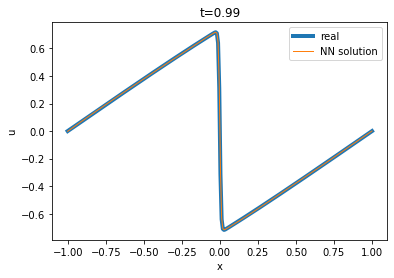

In [140]:
n = 99
x1 = torch.tensor(x).float()
t1 = torch.ones_like(x1)*t[n].sum()
u = model(x1,t1)
plt.plot(x,u_real[:,n],linewidth=4,label='real')
plt.plot(x,u.detach().numpy(),linewidth=1,label='NN solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('t=%.2g' % t[n].sum())
plt.legend(loc='best')